<a href="https://colab.research.google.com/github/evisChan/BusTicket/blob/master/Assigment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
data =pd.read_csv('/content/drive/MyDrive/Stupend-sc/heart.csv')

In [16]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# Data Preparation

## Missing Values

In [17]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [22]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Semua values tidak ada yang kosong ( memiliki nilai) maka tidak perlu merubahnya

In [20]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Duplicated Value Check and Handling

In [23]:
data.duplicated().sum()

723

In [24]:
data[data.duplicated(keep=False)].sort_values('age').head(6)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
60,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
118,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
668,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
64,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
572,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
143,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1


In [25]:
data = data.drop_duplicates()

In [26]:
data.duplicated().sum()

0

## Imbalance data

## Outlier

Tidak dalam semua kasus kita harus meremove data outlier :
- apakah outlier tersebut data error -> remove data tersebut
- Memang sebaran datanya seperti itu -> jangan remove data tersebut
centering dan scaling terhadap data untuk meminimalisir dampak buruk outlier tersebut terhadap model.

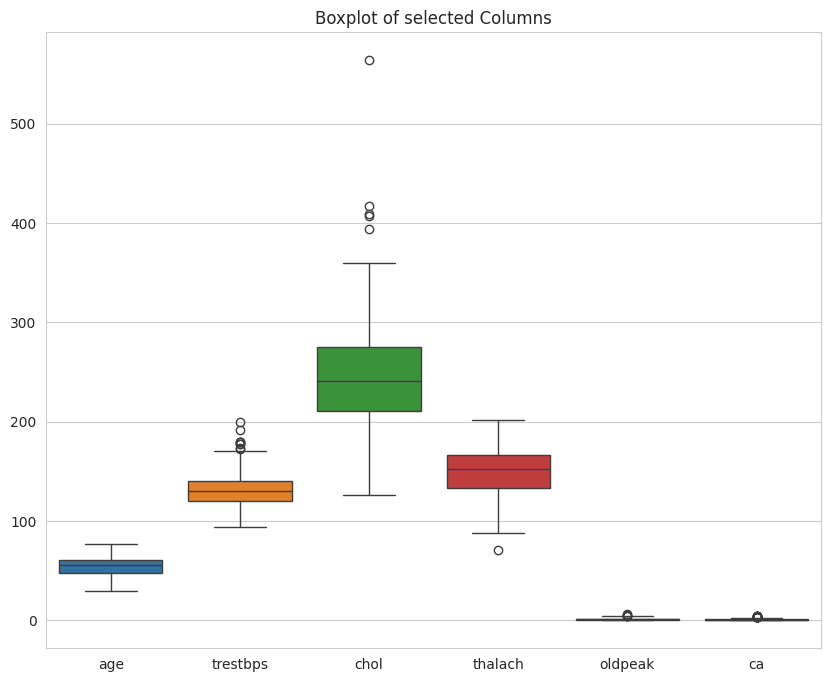

In [31]:
# Menampilkan Outlier menggunakan Boxplot
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data=data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak','ca']])
plt.title('Boxplot of selected Columns')
plt.show()

In [ ]:
#Removing (statistical) outliers
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.95)
IQR = Q3 - Q1
data = data[(data >= Q1 - 1.5*IQR) & (data <= Q3 + 1.5*IQR)]
data

<Axes: >

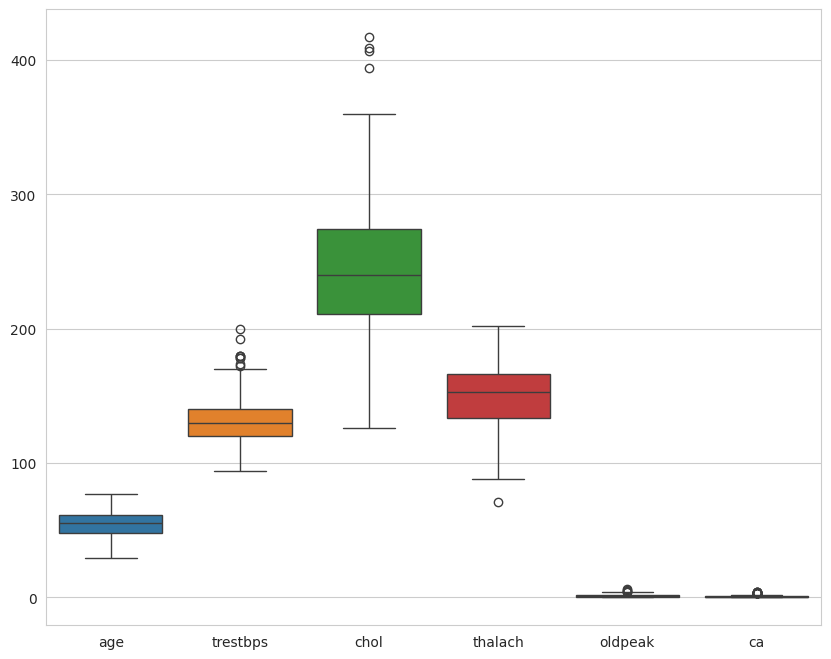

In [37]:
# Mengecek kembali outlier
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data=data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak','ca']])

## Imbalance Data

In [ ]:
from sklearn.ensemble import ExtraTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from utilities import visualize_classifier

ImportError: cannot import name 'ExtraTreeClassifier' from 'sklearn.ensemble' (/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/__init__.py)

In [ ]:
data = np.loadtxt('data_imbalance.txt')